In [9]:
.libPaths()

[1] "D:/CCR_AOS/WASS2SHydroRTraining/renv/library/R-4.3/x86_64-w64-mingw32"                 
[2] "C:/Users/ARSENE/AppData/Local/R/cache/R/renv/sandbox/R-4.3/x86_64-w64-mingw32/da749863"

In [1]:
.libPaths("D:/CCR_AOS/WASS2SHydroRTraining/renv/library/R-4.3/x86_64-w64-mingw32")

In [2]:
devtools::install_github("kiema97/AGRHYMET-WASS2SHydroR")

Using GitHub PAT from the git credential store.


Warning message in untar2(tarfile, files, list, exdir, restore_times):
"skipping pax global extended headers"
Warning message in untar2(tarfile, files, list, exdir, restore_times):
"skipping pax global extended headers"


units (0.8-7 -> 1.0-0) [CRAN]


Installing 1 packages: units

Installing package into 'D:/CCR_AOS/WASS2SHydroRTraining/renv/library/R-4.3/x86_64-w64-mingw32'
(as 'lib' is unspecified)



package 'units' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ARSENE\AppData\Local\Temp\Rtmp2BksTo\downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file 'C:\Users\ARSENE\AppData\Local\Temp\Rtmp2BksTo\remotes1a2878d555cd\kiema97-AGRHYMET-WASS2SHydroR-875956b/DESCRIPTION' (607ms)
─  preparing 'WASS2SHydroR':
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts (383ms)
─  checking for empty or unneeded directories
─  building 'WASS2SHydroR_0.1.0.tar.gz'
   


Installing package into 'D:/CCR_AOS/WASS2SHydroRTraining/renv/library/R-4.3/x86_64-w64-mingw32'
(as 'lib' is unspecified)



In [10]:
install.packages("kknn")

The following package(s) will be installed:
- igraph [2.1.4]
- kknn   [1.4.1]
These packages will be installed into "D:/CCR_AOS/WASS2SHydroRTraining/renv/library/R-4.3/x86_64-w64-mingw32".

# Installing packages --------------------------------------------------------
- Installing igraph ...                         OK [copied from cache in 0.38s]
- Installing kknn ...                           OK [copied from cache in 0.26s]


In [3]:
library(sf)
library(WASS2SHydroR)


Linking to GEOS 3.11.2, GDAL 3.8.2, PROJ 9.3.1; sf_use_s2() is TRUE



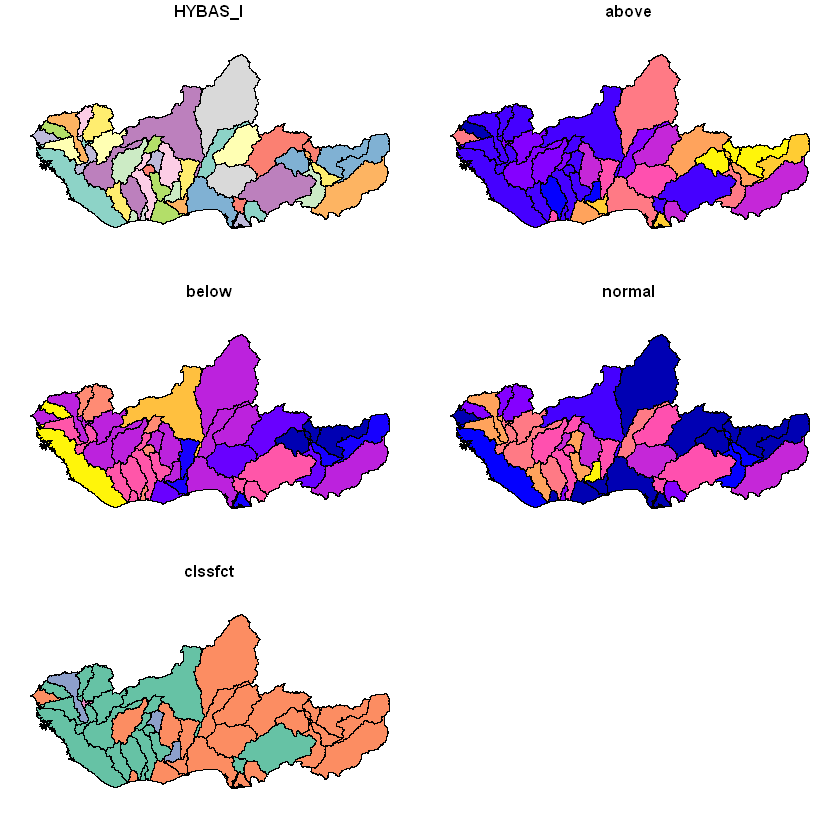

In [5]:
subbassins <- sf::read_sf("D:/CCR_AOS/WASS2S_HYDRO/outputs/evaluation/gis/2024_frcst_probas_consolide_classify.shp")
plot(subbassins)

In [4]:
basins <- c(1040786860,1040709280,1040786690,1040873650,1040709030,1040915990,1040023890,1040722720,1040873640,1040641670)

In [5]:
data_by_product <- WASS2SHydroR::make_toy_data_by_product(
    basins = basins,
    years = 1990:2023,
    products = c("SST_CMCC", "SST_ECMWF", "SST_JMA"),
    p = 15,
    signal_strength = 0.7,
    miss_rate = 0.08,
    seed = 123
  )

In [9]:
install.packages(c("earth"))

# Downloading packages -------------------------------------------------------
- Downloading earth from CRAN ...               OK [file is up to date]
- Downloading Formula from CRAN ...             OK [file is up to date]
- Downloading plotmo from CRAN ...              OK [file is up to date]
- Downloading plotrix from CRAN ...             OK [file is up to date]
Successfully downloaded 4 packages in 23 seconds.

The following package(s) will be installed:
- earth   [5.3.4]
- Formula [1.2-5]
- plotmo  [3.6.4]
- plotrix [3.8-4]
These packages will be installed into "D:/CCR_AOS/WASS2SHydroRTraining/renv/library/R-4.3/x86_64-w64-mingw32".

# Installing packages --------------------------------------------------------
- Installing Formula ...                        OK [installed binary and cached in 0.41s]
- Installing plotrix ...                        OK [installed binary and cached in 0.45s]
- Installing plotmo ...                         OK [installed binary and cached in 0.46s]
- Ins

In [ ]:
results <- wass2s_run_basins_ml(data_by_product = data_by_product,
                                 hybas_id = "HYBAS_ID",
                                 pred_pattern_by_product = "pt_",
                                 models = c("rf","mlp", "mars"),
                                 final_fuser = "kknn",
                                 quiet = FALSE,parallel = TRUE,allow_par = FALSE,
                                 workers = 5 )
saveRDS(results,"results.rds")

Processing 10 basins



In [2]:
getwd()

[1] "D:/CCR_AOS/Wass2sHydro-Training"

In [1]:
readRDS(results.rds)

ERROR: Error: object 'results.rds' not found
